In [83]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score



## 1. Download the Breast Cancer 
Wisconsin dataset https://www.kaggle.com/
datasets/uciml/breast-cancer-wisconsin-data and perform all the necessary data pre-processing.

In [84]:
data = pd.read_csv('./archive/data.csv')
data.head()
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']

if X.shape[0] == 0 or y.shape[0] == 0:
    print("Dataset is empty. Please check the data loading step.")
else:
    print(f"Dataset loaded successfully with {X.shape[0]} samples.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


imputer = SimpleImputer(strategy='mean')


X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

Dataset loaded successfully with 569 samples.


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


## 2. Use the Scikit-learn implementation of SVM 
(the SVC() function) to predict if the
tumor is malignant or not. Try different kernels.
Try different:

• kernels

In [85]:

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svc = SVC(kernel=kernel)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    print(f"Kernel: {kernel}")
    print(classification_report(y_test, y_pred))

Kernel: linear
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Kernel: poly
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.93        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Kernel: rbf
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.93        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95 

The linear kernel has the highest accuracy (0.96) and balanced performance across precision, recall, and F1-score for both classes. Therefore, the linear kernel is the best choice among the tested kernels.

## 3. Try new

• regularization parameters (C)

• different σ values when using the RBF kernel ( γ ==  gamma == σ )

Find the best values for the parameters and do a grid search. Tip: take a look at
the GridSearchCV() function.

In [86]:
# Step 6: Perform grid search to find the best parameters
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)
print(grid.best_params_)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

Conclusion
The best model found by the grid search has the following performance metrics:

Accuracy: 0.93

Precision: 0.96 (class 0), 0.89 (class 1)

Recall: 0.93 (class 0), 0.93 (class 1)

F1-Score: 0.94 (class 0), 0.91 (class 1)

This model with C=1 and gamma=0.001 using the RBF kernel is the best among the tested configurations. It provides a good balance between precision, recall, and F1-score for both classe

## 4. Implement kernel ridge regression 
to model the data from Ucilnica. Implement different kernels. Train and test your kernel regression model. 

## 5. Plot the model fit to your train data and to the predictions.
Ridge regression is a linear model. What kind of predictions did you get? Comment


In [87]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

RBF Kernel is the BEST

LOWEST MSE: 0.047

HIGHEST R²: 0.8

Kernel: linear
Mean Squared Error: 0.1797502373093207
R-squared Score: 0.23483980213824696


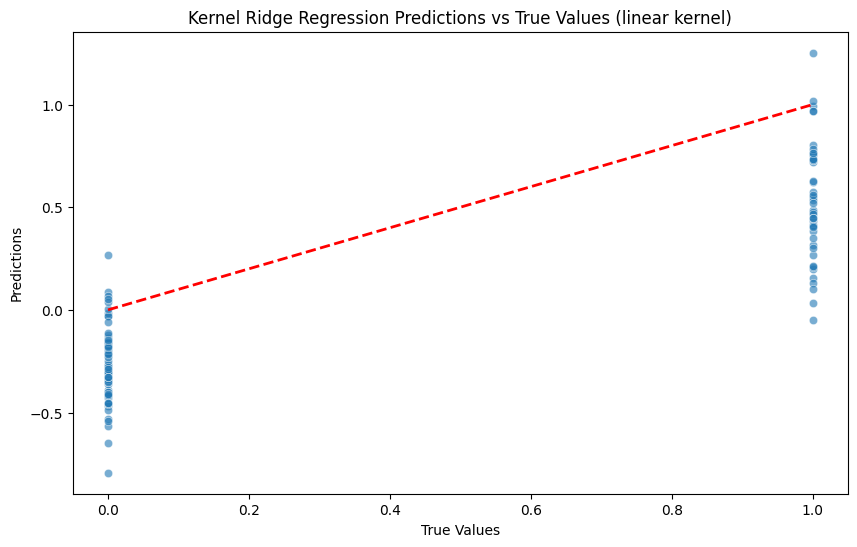

Kernel: poly
Mean Squared Error: 0.05024489628844218
R-squared Score: 0.7861176966378662


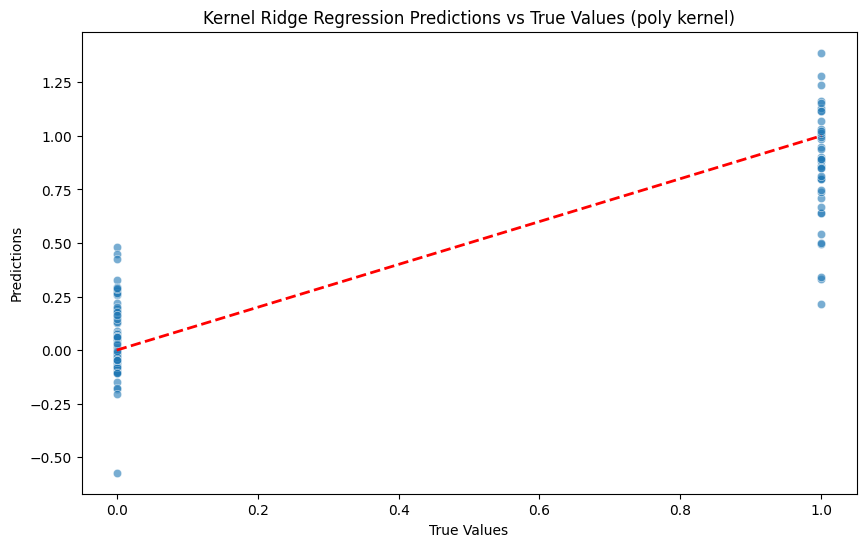

Kernel: rbf
Mean Squared Error: 0.04675714181294731
R-squared Score: 0.8009643580081679


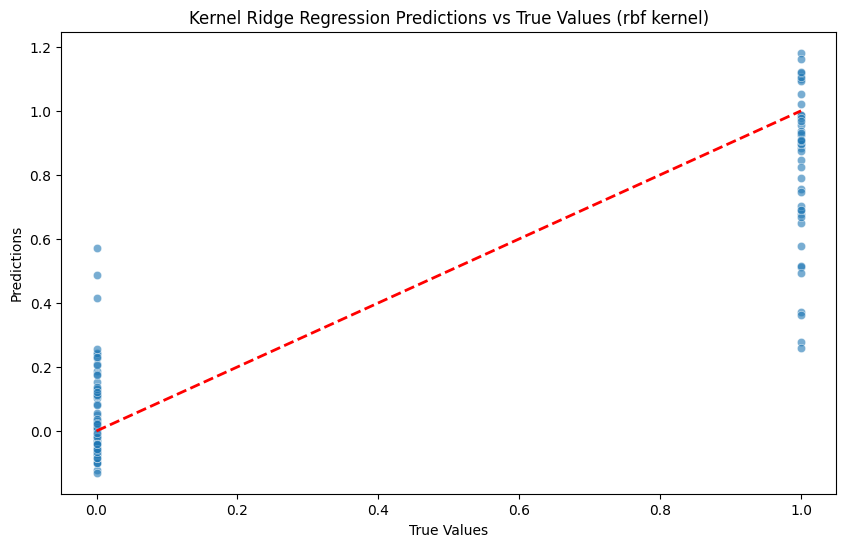

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Kernel: sigmoid
Mean Squared Error: 0.7414497951721981
R-squared Score: -2.156200962351093


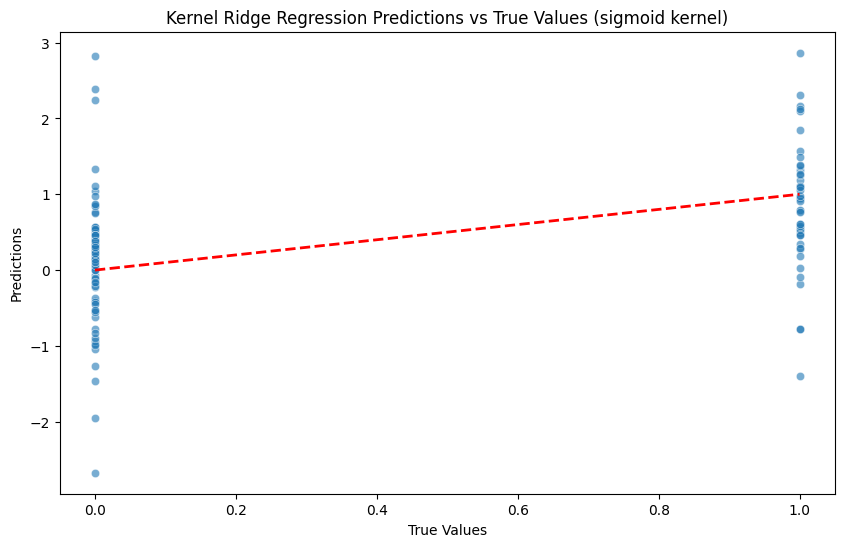

In [88]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    kr = KernelRidge(kernel=kernel, alpha=1.0)
    kr.fit(X_train_scaled, y_train)
    y_pred_kr = kr.predict(X_test_scaled)
    
    # Evaluate the model using regression metrics
    mse = mean_squared_error(y_test, y_pred_kr)
    r2 = r2_score(y_test, y_pred_kr)
    print(f"Kernel: {kernel}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")
    
    # Plot the predictions vs true values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_kr, alpha=0.6, edgecolors='w', linewidth=0.5)
    plt.plot([0, 1], [0, 1], 'r--', lw=2)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'Kernel Ridge Regression Predictions vs True Values ({kernel} kernel)')
    plt.show()